# MOHAMMAD NIKS IKSAN
## PRACT

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#Import data
url = 'https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv'
data = pd.read_csv(url, index_col=0)
data.head()

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
Team,,,,,,,,,,,,,,,,,,,,,
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,58,63,362,518,0,543,295,4,64.0,89.0
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,76,78,314,610,2,639,317,1,58.8,84.4
Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,...,85,73,351,618,2,593,330,2,59.9,87.6
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,121,112,326,626,3,770,411,5,56.7,83.2
Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,...,133,118,412,609,2,762,404,7,56.1,83.3


In [3]:
data1 = data.reset_index()

# 1. Is this data clean? 

In [4]:
#Checking missing values
data1.isnull().any()

Team                             False
category                         False
general_league_position          False
finance _live_games_televised    False
finance _tv_revenue              False
general_matches_played           False
general_won                      False
general_draw                     False
general_lost                     False
attack_scored                    False
defence_goals_conceeded          False
general_goal_difference          False
general_points                   False
general_squad_size               False
general_squad_average_age        False
general_squad_foreigners         False
finance _team_market             False
finance _market_average          False
attack_passes                    False
attack_passes_through            False
attack_passes_long               False
attack_passes_back               False
attack_crosses                   False
attack_corners_taken             False
attack_shots                     False
attack_shots_on_target   

In [5]:
data1['Team'].duplicated().any()

False

In [6]:
#Check data types
data1.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [7]:
data1[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']]

,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
0,"26,581","1,814","4,240",543
1,"23,638","2,250","3,416",639
2,"25,070","1,774","3,874",593
3,"21,295","2,267","3,191",770
4,"20,805","2,062","3,102",762
5,"19,202","2,242","2,634",785
6,"16,618","2,552","2,515",824
7,"16,494","2,310","2,362",825
8,"17,219","2,335","2,593",945
9,"16,358","2,315","2,273",855


In [8]:
#remove comas
data.replace(',','', regex=True, inplace=True)

In [9]:
data[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']]

,attack_passes,attack_passes_long,attack_passes_back,defence_clearances
Team,,,,
Manchester City,26581,1814,4240,543
Liverpool,23638,2250,3416,639
Chelsea,25070,1774,3874,593
Tottenham,21295,2267,3191,770
Arsenal,20805,2062,3102,762
Manchester United,19202,2242,2634,785
Wolverhampton,16618,2552,2515,824
Everton,16494,2310,2362,825
Leicester,17219,2335,2593,945


In [10]:
data[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']] = data[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].apply(pd.to_numeric)

In [11]:
#Check data types
data.dtypes

category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots                       int64
attack_shots_on_

In [12]:
#Check missing values
data.isnull().any()

category                         False
general_league_position          False
finance _live_games_televised    False
finance _tv_revenue              False
general_matches_played           False
general_won                      False
general_draw                     False
general_lost                     False
attack_scored                    False
defence_goals_conceeded          False
general_goal_difference          False
general_points                   False
general_squad_size               False
general_squad_average_age        False
general_squad_foreigners         False
finance _team_market             False
finance _market_average          False
attack_passes                    False
attack_passes_through            False
attack_passes_long               False
attack_passes_back               False
attack_crosses                   False
attack_corners_taken             False
attack_shots                     False
attack_shots_on_target           False
attack_goals_headed      

# 2. How is the point distribution of the epl team? and which team is an anomaly?

In [13]:
#Select coloumn general points
df2 = data[['general_points']]

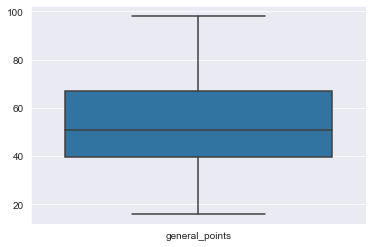

In [14]:
#Generete Boxplot
sns.set_style('darkgrid')
sns.boxplot(data = df2)
plt.show()

C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


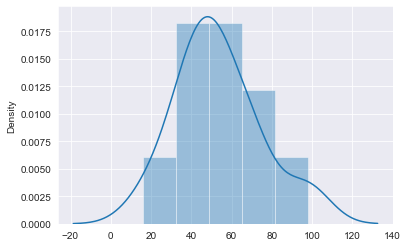

The skewness of general points is [0.56316362].


In [15]:
#Generate Skewness
s = skew(df2)
plt.figure()
sns.distplot(df2)
plt.show()
print(f'The skewness of general points is {s}.')

# 3. Which team has the best attack? 

In [16]:
#Create new column 'goal_AVG/game'
data['goal_AVG/game'] = data['attack_scored']/data['general_matches_played']

In [17]:
#Sorting 
df3 = data.sort_values(by=['goal_AVG/game'], ascending = False)

In [18]:
df3.head()

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,goal_AVG/game
Team,,,,,,,,,,,,,,,,,,,,,
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,63,362,518,0,543,295,4,64.0,89.0,2.500000
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,78,314,610,2,639,317,1,58.8,84.4,2.342105
Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,...,118,412,609,2,762,404,7,56.1,83.3,1.921053
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,112,326,626,3,770,411,5,56.7,83.2,1.763158
Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,...,128,355,581,2,785,370,6,53.3,82.3,1.710526


In [19]:
#Create list color
clrs3 = ['grey' if (y < max(data['goal_AVG/game'])) else 'blue' for y in data['goal_AVG/game'] ]

<AxesSubplot:xlabel='goal_AVG/game', ylabel='Team'>

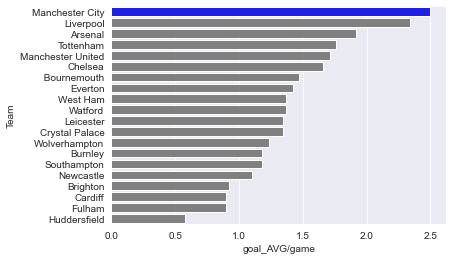

In [20]:
#Create barplot
sns.barplot(x='goal_AVG/game', y=df3.index, data=df3, palette= clrs3)

In [21]:
#Get team with the best attack
team_attack = data['goal_AVG/game'].idxmax()
value = data['goal_AVG/game'].max()
print(f'{team_attack} has the best attack with average value of {value} goals/game')

Manchester City has the best attack with average value of 2.5 goals/game


# 4. Which team has the best defence? 

In [22]:
#Create new column 'conceeded_AVG/game'
data['conceeded_AVG/game'] = data['defence_goals_conceeded']/data['general_matches_played']

In [23]:
data

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,goal_AVG/game,conceeded_AVG/game
Team,,,,,,,,,,,,,,,,,,,,,
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,362,518,0,543,295,4,64.0,89.0,2.500000,0.605263
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,314,610,2,639,317,1,58.8,84.4,2.342105,0.578947
Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,...,351,618,2,593,330,2,59.9,87.6,1.657895,1.026316
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,326,626,3,770,411,5,56.7,83.2,1.763158,1.026316
Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,...,412,609,2,762,404,7,56.1,83.3,1.921053,1.342105
Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,...,355,581,2,785,370,6,53.3,82.3,1.710526,1.421053
Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,...,501,720,2,824,464,4,47.4,78.2,1.236842,1.210526
Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,...,456,700,4,825,430,5,51.0,77.3,1.421053,1.210526
Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,...,436,676,4,945,500,5,50.8,79.2,1.342105,1.263158


In [24]:
#Sorting
df4 = data.sort_values(by=['conceeded_AVG/game'])

In [25]:
df4.head()

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,goal_AVG/game,conceeded_AVG/game
Team,,,,,,,,,,,,,,,,,,,,,
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,314,610,2,639,317,1,58.8,84.4,2.342105,0.578947
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,362,518,0,543,295,4,64.0,89.0,2.500000,0.605263
Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,...,351,618,2,593,330,2,59.9,87.6,1.657895,1.026316
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,326,626,3,770,411,5,56.7,83.2,1.763158,1.026316
Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,...,501,720,2,824,464,4,47.4,78.2,1.236842,1.210526


In [26]:
#Create list color
clrs4 = ['grey' if (y > min(df4['conceeded_AVG/game'])) else 'red' for y in df4['conceeded_AVG/game']]

<AxesSubplot:xlabel='conceeded_AVG/game', ylabel='Team'>

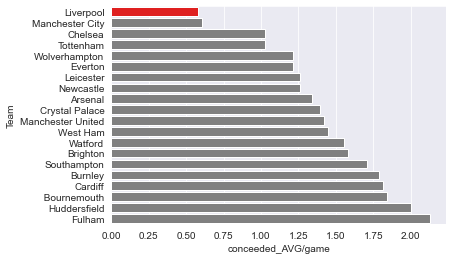

In [27]:
#Generate Barplot
sns.barplot(x='conceeded_AVG/game', y=df4.index, data=df4, palette= clrs4)

In [28]:
#Get team with the best defence
team_defence = data['conceeded_AVG/game'].idxmin()
value2 = data['conceeded_AVG/game'].min()
print(f'{team_defence} has the best defence with average value of {value2} goals conceeded/game')

Liverpool has the best defence with average value of 0.5789473684210527 goals conceeded/game


# 5. Which team is good in the financial aspect? 

In [29]:
#Check columns
data.columns

Index(['category', 'general_league_position', 'finance _live_games_televised',
       'finance _tv_revenue', 'general_matches_played', 'general_won',
       'general_draw', 'general_lost', 'attack_scored',
       'defence_goals_conceeded', 'general_goal_difference', 'general_points',
       'general_squad_size', 'general_squad_average_age',
       'general_squad_foreigners', 'finance _team_market',
       'finance _market_average', 'attack_passes', 'attack_passes_through',
       'attack_passes_long', 'attack_passes_back', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target',
       'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box',
       'attack_goals_outsidebox', 'general_card_yellow', 'general_card_red',
       'attack_goals_counter', 'attack_goals_freekick', 'defence_saves',
       'defence_blocks', 'defence_interceptions', 'defence_tackles',
       'defence_tackles_last_man', 'defence_clearances',
       'defence_clearances_hea

In [30]:
#Select 'finance _live_games_televised','finance _tv_revenue','finance _team_market','finance _market_average'
df5 = data[['finance _live_games_televised','finance _tv_revenue','finance _team_market','finance _market_average']]

In [31]:
df5.head()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
Team,,,,
Manchester City,26,150986355,1003200000,39987200
Liverpool,29,152425146,836440000,34848000
Chelsea,25,146030216,779460000,29981600
Tottenham,26,145230801,735240000,29409600
Arsenal,25,142193180,701800000,26989600


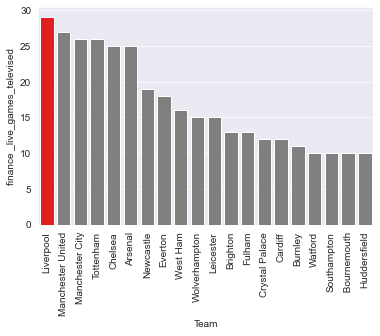

In [32]:
#Create barplot for finance _live_games_televised
df51 = df5.sort_values('finance _live_games_televised', ascending=False)
clrs51 = ['grey' if (x < max(df51['finance _live_games_televised'])) else 'red' for x in df51['finance _live_games_televised'] ]
bar51 = sns.barplot(x=df51.index, y='finance _live_games_televised', data=df51, palette= clrs51)
for i in bar51.get_xticklabels():
    i.set_rotation(90)

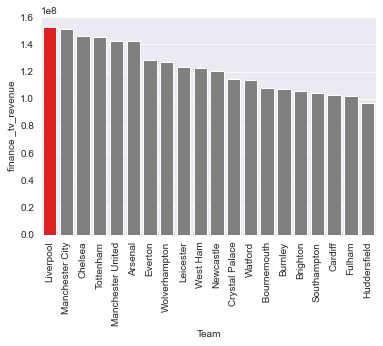

In [33]:
#Create barplot for finance _tv_revenue
df52 = df5.sort_values('finance _tv_revenue', ascending=False)
clrs52 = ['grey' if (x < max(df52['finance _tv_revenue'])) else 'red' for x in df52['finance _tv_revenue'] ]
bar52 = sns.barplot(x=df52.index, y='finance _tv_revenue', data=df52, palette= clrs52)
for i in bar52.get_xticklabels():
    i.set_rotation(90)

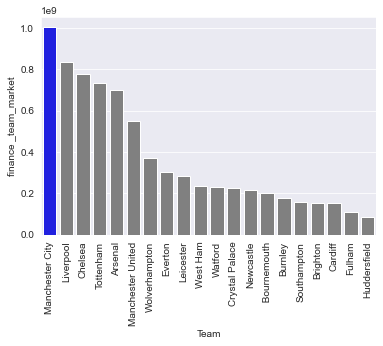

In [34]:
#Create barplot for finance _team_market
df53 = df5.sort_values('finance _team_market', ascending=False)
clrs53 = ['grey' if (x < max(df53['finance _team_market'])) else 'blue' for x in df53['finance _team_market'] ]
bar53 = sns.barplot(x=df53.index, y='finance _team_market', data=df53, palette= clrs53)
for i in bar53.get_xticklabels():
    i.set_rotation(90)

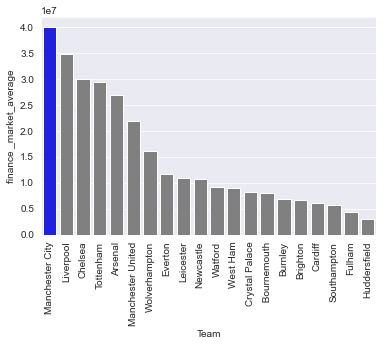

In [35]:
#Create barplot for finance _market_average
df54 = df5.sort_values('finance _market_average', ascending=False)
clrs54 = ['grey' if (x < max(df54['finance _market_average'])) else 'blue' for x in df54['finance _market_average'] ]
bar54 = sns.barplot(x=df54.index, y='finance _market_average', data=df54, palette= clrs54)
for i in bar54.get_xticklabels():
    i.set_rotation(90)

In [36]:
#Create minmax scaler for scaling the features
scaler = MinMaxScaler()
df5[df5.columns] = scaler.fit_transform(df5[df5.columns])

<ipython-input-36-7734bb1d955c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[df5.columns] = scaler.fit_transform(df5[df5.columns])
C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [37]:
df5.head()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
Team,,,,
Manchester City,0.842105,0.974213,1.000000,1.000000
Liverpool,1.000000,1.000000,0.818286,0.860853
Chelsea,0.789474,0.885388,0.756197,0.729092
Tottenham,0.842105,0.871060,0.708012,0.713605
Arsenal,0.789474,0.816619,0.671573,0.648082


In [38]:
#Create column 'AVG_Revenue'
df5['AVG_Revenue'] = df5.mean(axis=1)

<ipython-input-38-2114fc4548e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['AVG_Revenue'] = df5.mean(axis=1)


In [39]:
df5.head()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,AVG_Revenue
Team,,,,,
Manchester City,0.842105,0.974213,1.000000,1.000000,0.954080
Liverpool,1.000000,1.000000,0.818286,0.860853,0.919785
Chelsea,0.789474,0.885388,0.756197,0.729092,0.790038
Tottenham,0.842105,0.871060,0.708012,0.713605,0.783696
Arsenal,0.789474,0.816619,0.671573,0.648082,0.731437


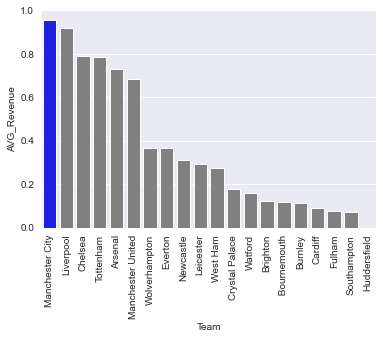

In [40]:
#Generate barplot for AVG_Revenue
df55 = df5.sort_values('AVG_Revenue', ascending=False)
clrs55 = ['grey' if (x < max(df55['AVG_Revenue'])) else 'blue' for x in df55['AVG_Revenue'] ]
bar55 = sns.barplot(x=df55.index, y='AVG_Revenue', data=df55, palette= clrs55)
for i in bar55.get_xticklabels():
    i.set_rotation(90)

In [41]:
#Get team with good financial
team_avg = df5['AVG_Revenue'].idxmax()
avg_value = df5['AVG_Revenue'].max()
print(f'{team_avg} has good average of financial value {avg_value}')

Manchester City has good average of financial value 0.9540796898933857


# 6. Explore your creativity!

In [42]:
data.head()

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,goal_AVG/game,conceeded_AVG/game
Team,,,,,,,,,,,,,,,,,,,,,
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,362,518,0,543,295,4,64.0,89.0,2.500000,0.605263
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,314,610,2,639,317,1,58.8,84.4,2.342105,0.578947
Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,...,351,618,2,593,330,2,59.9,87.6,1.657895,1.026316
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,326,626,3,770,411,5,56.7,83.2,1.763158,1.026316
Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,...,412,609,2,762,404,7,56.1,83.3,1.921053,1.342105


In [43]:
#Select column 'general_squad_average_age'
df61 = data[['general_squad_average_age']]

In [44]:
#Sorting
df61 = df61.sort_values(by=['general_squad_average_age'])

In [45]:
#Create list color, blue for the youngest team, red for the oldest team
clrs61= []
for i in df61['general_squad_average_age']:
    if i == min(df61['general_squad_average_age']):
        clrs61.append('blue')
    elif i ==max(df61['general_squad_average_age']):
        clrs61.append('red')
    else:
        clrs61.append('grey')

<AxesSubplot:xlabel='general_squad_average_age', ylabel='Team'>

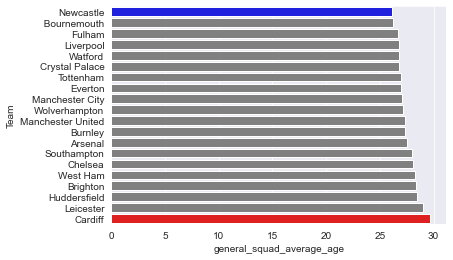

In [46]:
#Generate barplot
sns.barplot(x='general_squad_average_age', y=df61.index, data=df61, palette= clrs61)

In [47]:
#Get team with the youngest player and the oldest player
young_team = df61['general_squad_average_age'].idxmin()
young_value = df61['general_squad_average_age'].min()
old_team = df61['general_squad_average_age'].idxmax()
old_value = df61['general_squad_average_age'].max()
print(f'{young_team} has the oldest player with average {young_value} yeas old')
print(f'{old_team} has the oldest player with average {old_value} yeas old')

Newcastle has the oldest player with average 26.1 yeas old
Cardiff has the oldest player with average 29.7 yeas old
